<a href="https://colab.research.google.com/github/jstrong123/jstrong123.github.io/blob/main/exoplanet_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyvo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 10.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyvo as vo

In [3]:
tap_service = vo.dal.TAPService("https://exoplanetarchive.ipac.caltech.edu/TAP")

## Example 1

Generating a query and producing results

In [4]:
query1 = "SELECT pl_name,pl_masse FROM ps WHERE pl_masse between 0.5 and 2.0"

In [5]:
job1 = tap_service.search(query1)

In [6]:
results1 = job1.to_table()

In [7]:
print(results1)

      pl_name        pl_masse
                      Mearth 
-------------------- --------
        Kepler-128 b     0.77
         Kepler-37 d      2.0
        Kepler-138 c     1.97
        Kepler-138 c      1.6
         Kepler-11 f      1.7
         Kepler-11 f      2.0
         Kepler-11 f     1.98
        Kepler-138 d     1.17
        Kepler-138 d     0.64
                 ...      ...
          HD 23472 e     0.72
          HD 23472 f     0.77
KMT-2016-BLG-1105L b     1.32
KMT-2016-BLG-1105L b     0.92
         LP 791-18 d      0.9
            AU Mic d    1.053
            GJ 806 b      1.9
        TOI-1450 A b    1.258
          TOI-1776 b      1.4
          TOI-6255 b     1.44
Length = 114 rows


In [8]:
masse_data1 = results1['pl_masse']

In [9]:
print(np.mean(masse_data1))

1.3790369298245613


## Example 2

Mass vs Radius

In [10]:
query2 = "SELECT pl_name,discoverymethod,pl_masse,pl_rade FROM ps WHERE pl_rade BETWEEN 0 AND 10 AND pl_masse BETWEEN 0.05 AND 40"

In [11]:
job2 = tap_service.search(query2)

In [12]:
results2 = job2.to_table()

In [13]:
print(results2)

  pl_name         discoverymethod      pl_masse pl_rade
                                        Mearth   Rearth
------------ ------------------------- -------- -------
  HAT-P-11 b                   Transit   25.743    4.73
  HAT-P-11 b                   Transit  28.6047    4.82
  HAT-P-11 b                   Transit 26.69772    4.45
 Kepler-20 d                   Transit     20.1    2.75
 Kepler-20 d                   Transit     13.4   2.606
 Kepler-20 d                   Transit    10.07   2.744
 Kepler-79 d                   Transit     11.3   6.912
 Kepler-79 d                   Transit      6.0    7.16
Kepler-106 e                   Transit    11.17    2.56
         ...                       ...      ...     ...
  TOI-1184 b                   Transit      6.8    2.41
  TOI-3261 b                   Transit     30.3    3.82
 TOI-1798.01                   Transit      6.5   2.385
   TOI-757 b                   Transit     10.5     2.5
  TOI-1408 c Transit Timing Variations      7.6 

In [14]:
unique_methods = np.unique(results2['discoverymethod'])
print(unique_methods)

       discoverymethod       
-----------------------------
Orbital Brightness Modulation
              Radial Velocity
                      Transit
    Transit Timing Variations


In [15]:
color_mapping = {
    'Orbital Brightness Modulation': 'blue',
    'Radial Velocity': 'orange',
    'Transit': 'green',
    'Transit Timing Variations': 'pink'
}

# Get the colors for each point based on the discovery method
colors = [color_mapping[method] for method in results2['discoverymethod']]


In [16]:
masse_data2 = results2['pl_masse']
rade_data2 = results2['pl_rade']


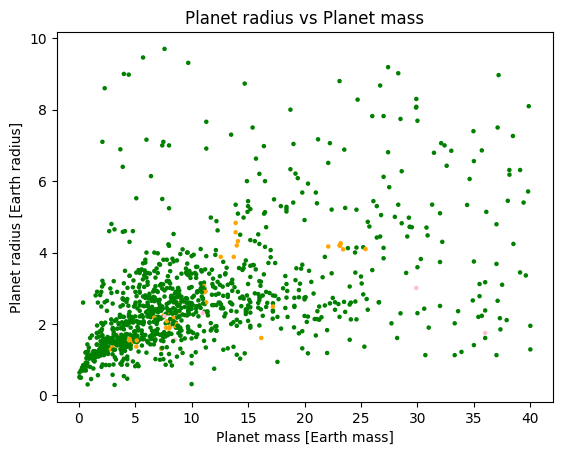

In [17]:
plt.figure()

plt.scatter(masse_data2, rade_data2, c=colors, s=5)
plt.xlabel('Planet mass [Earth mass]')
plt.ylabel('Planet radius [Earth radius]')
plt.title('Planet radius vs Planet mass')

plt.show()

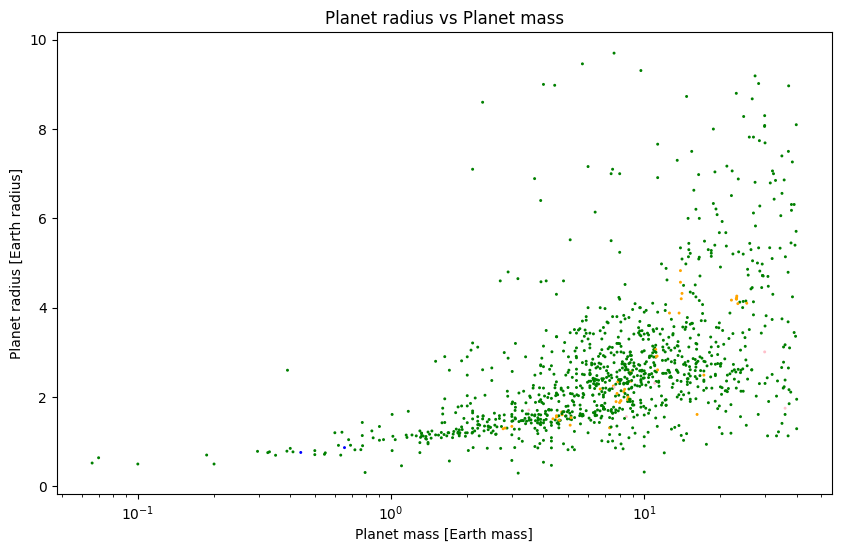

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(masse_data2, rade_data2, marker='.', c=colors, s=5)
plt.xlabel('Planet mass [Earth mass]')
plt.xscale('log') # Put a log scale on x (mass) axis
plt.ylabel('Planet radius [Earth radius]')
plt.title('Planet radius vs Planet mass')

# Can't work out how to add legend

plt.show()

## Example 3+4

Planet mass [3] and radius [4] vs orbital period


In [143]:
query3 = "SELECT pl_name,discoverymethod,pl_massj,pl_rade,pl_orbper FROM ps"

add  "WHERE pl_rade BETWEEN 0.5 AND 1.6 AND pl_masse BETWEEN 0.1 AND 3"

---> for Earth like habitable planets

In [144]:
job3 = tap_service.search(query3)

In [145]:
results3 = job3.to_table()

In [155]:
unique_methods = np.unique(results3['discoverymethod'])
print(unique_methods)

       discoverymethod       
-----------------------------
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations


In [158]:
import matplotlib.cm as cm

# Generate a colormap
num_methods = len(unique_methods)
colormap = cm.get_cmap('tab12', num_methods)  # 'tab12' is a qualitative colormap suitable for categorical data

# Create a color mapping dictionary
color_mapping = {method: colormap(i) for i, method in enumerate(unique_methods)}

# Get the colors for each point based on the discovery method
colors = [color_mapping[method] for method in results3['discovery_method']]

<ipython-input-158-aea58cc146fa>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab12', num_methods)  # 'tab12' is a qualitative colormap suitable for categorical data


ValueError: 'tab12' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [153]:
color_mapping = {
    'Orbital Brightness Modulation': 'blue',
    'Radial Velocity': 'orange',
    'Transit': 'green',
    'Transit Timing Variations': 'pink'
    'Astrometry': 'red',
    'Astrometry': 'red',
}

# Get the colors for each point based on the discovery method
colors = [color_mapping[method] for method in results3['discoverymethod']]

KeyError: 'Imaging'

In [154]:
massj_data3 = results3['pl_massj']
rade_data3 = results3['pl_rade']
orbper_data3 = results3['pl_orbper']

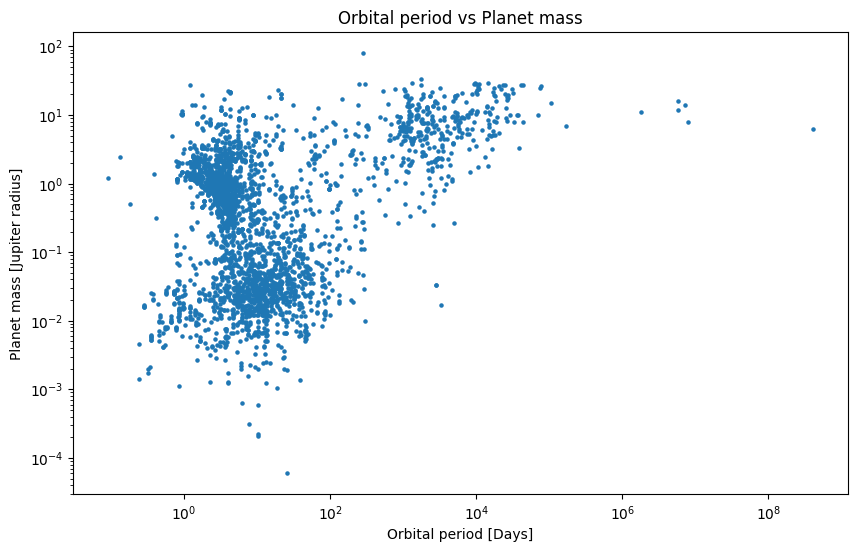

In [162]:
plt.figure(figsize=(10,6))

plt.scatter(orbper_data3, massj_data3, s=5)#, c=colors)
plt.xlabel('Orbital period [Days]')
plt.ylabel('Planet mass [Jupiter radius]')
plt.title('Orbital period vs Planet mass')

plt.xscale('log')
plt.yscale('log')

plt.show()

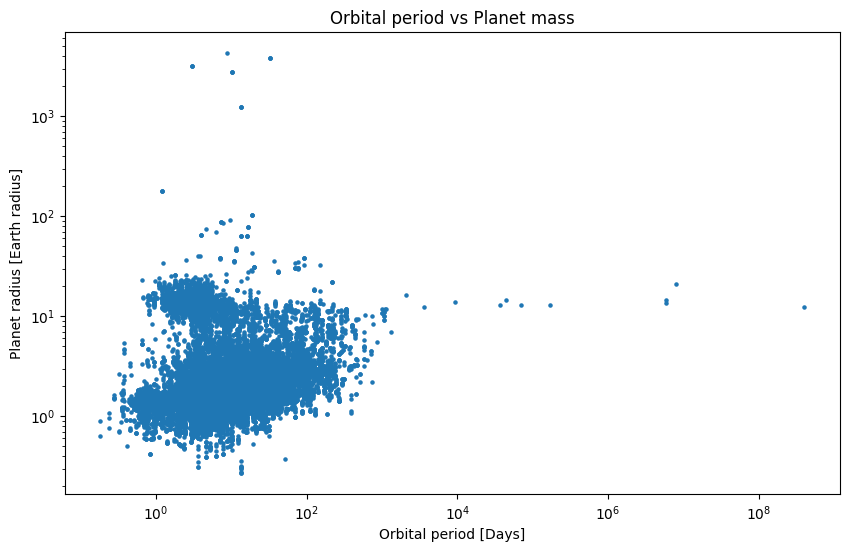

In [163]:
plt.figure(figsize=(10,6))

plt.scatter(orbper_data3, rade_data3, s=5)#, c=colors)
plt.xlabel('Orbital period [Days]')
plt.ylabel('Planet radius [Earth radius]')
plt.title('Orbital period vs Planet mass')

plt.xscale('log')
plt.yscale('log')

plt.show()